# Análise de CV match



In [ ]:
!pip install pdfplumber

In [3]:
import pdfplumber as pdf
import nltk

In [4]:
arquivo_pdf = pdf.open("Currículo Atualizado.pdf")

In [6]:
first_page = arquivo_pdf.pages[0]

#### Extração do texto do pdf

In [9]:
texto_cru = first_page.extract_text()
texto_cru

'Abel Rapha de Jesus Macedo \nBrasileiro, solteiro, 21 anos \nEndereço: Avenida Antônio Carvalho de Miranda, 720 Campinas-SP \nTelefones: 11 999381414/ 11 982076109 / 11 999721506 \nE-mail: contato@abelrapha.com / abelrapha@gmail.com  \n \nFORMAÇÃO ACADÊMICA \n \n\uf0b7 Universidade estadual de Campinas (UNICAMP) – Engenharia de Transportes, previsão \nde formação no 2° semestre de 2026 | Estudante do 4º período \nTOP 10 Alunos da Turma \n \n \nPROJETOS CONCRETOS \n \n1. Projeto completo de DATA SCIENCE: \n DataProjects/Projetos_em_Python/AIRBNB_RIO at main · AbelRapha/DataProjects \n(github.com)  \nNeste projeto desenvolvi um modelo de Machine Learning para conseguir prever o \nvalor da diária para locadores no AIRBNB \n \n2. Projeto completo Credit Score: \nmutualinvest.herokuapp.com \nAbelRapha/MutualChallenge (github.com)  \nNeste projeto eu fiz para resolver um desafio proposta pela empresa Mutual \nInvest para conseguir classificar a indimplência da sua base de clientes. \n \n3. 

#### Verificando os metadados do currículo

In [10]:
arquivo_pdf.metadata

{'Author': 'João Paulo',
 'CreationDate': "D:20211110174233+00'00'",
 'Creator': 'Microsoft® Word 2016',
 'ModDate': 'D:20211110174233Z',
 'Producer': 'www.ilovepdf.com'}

#### Verificando links dentro do portfólio

In [11]:
arquivo_pdf.hyperlinks

[{'bottom': Decimal('138.410'),
  'contents': None,
  'data': {'A': {'S': /'URI',
    'Type': /'Action',
    'URI': b'mailto:contato@abelrapha.com'},
   'BS': {'W': 0},
   'F': 4,
   'Rect': [123.54, 704.71, 250.02, 717.46],
   'StructParent': 0,
   'Subtype': /'Link'},
  'doctop': Decimal('125.660'),
  'height': Decimal('12.750'),
  'object_type': 'annot',
  'page_number': 1,
  'title': None,
  'top': Decimal('125.660'),
  'uri': 'mailto:contato@abelrapha.com',
  'width': Decimal('126.480'),
  'x0': Decimal('123.540'),
  'x1': Decimal('250.020'),
  'y0': Decimal('704.710'),
  'y1': Decimal('717.460')},
 {'bottom': Decimal('138.410'),
  'contents': None,
  'data': {'A': {'S': /'URI',
    'Type': /'Action',
    'URI': b'mailto:abelrapha@gmail.com'},
   'BS': {'W': 0},
   'F': 4,
   'Rect': [257.1, 704.71, 373.47, 717.46],
   'StructParent': 1,
   'Subtype': /'Link'},
  'doctop': Decimal('125.660'),
  'height': Decimal('12.750'),
  'object_type': 'annot',
  'page_number': 1,
  'title': N

In [12]:
print(texto_cru)

Abel Rapha de Jesus Macedo 
Brasileiro, solteiro, 21 anos 
Endereço: Avenida Antônio Carvalho de Miranda, 720 Campinas-SP 
Telefones: 11 999381414/ 11 982076109 / 11 999721506 
E-mail: contato@abelrapha.com / abelrapha@gmail.com  
 
FORMAÇÃO ACADÊMICA 
 
 Universidade estadual de Campinas (UNICAMP) – Engenharia de Transportes, previsão 
de formação no 2° semestre de 2026 | Estudante do 4º período 
TOP 10 Alunos da Turma 
 
 
PROJETOS CONCRETOS 
 
1. Projeto completo de DATA SCIENCE: 
 DataProjects/Projetos_em_Python/AIRBNB_RIO at main · AbelRapha/DataProjects 
(github.com)  
Neste projeto desenvolvi um modelo de Machine Learning para conseguir prever o 
valor da diária para locadores no AIRBNB 
 
2. Projeto completo Credit Score: 
mutualinvest.herokuapp.com 
AbelRapha/MutualChallenge (github.com)  
Neste projeto eu fiz para resolver um desafio proposta pela empresa Mutual 
Invest para conseguir classificar a indimplência da sua base de clientes. 
 
3. Projeto completo Análise empreend

# Realizando o pré-processamento dos dados

In [ ]:
# utilizando a word_tokenize() onde ele quebra o texto em palavras
nltk.download('punkt')
lista_de_palavras = nltk.tokenize.word_tokenize(texto_cru)
lista_de_palavras

In [ ]:
#Realizndo o tratamento dos dados na lista de palavras

lista_de_palavras = [palavra.lower() for palavra in lista_de_palavras]
lista_de_palavras

In [25]:
#Removendo pontos, virgulas, conectivos e pronomes. Ou seja, apenas palavras digamos sem valor crucial para classificar um currículo
pontuacoes = ['(',')',';',':','[',']',',','-','.']

In [ ]:
#Criando uma lista de stop words "a", "de", "um", "que", conectivos que não possuem valor para identificação de palavras chaves

nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('portuguese')
stop_words

In [26]:
#criando uma lista de palavras sem stopwords e pontuações

keywords = [palavra for palavra in lista_de_palavras if not palavra in stop_words and not palavra in pontuacoes]
keywords

['abel',
 'rapha',
 'jesus',
 'macedo',
 'brasileiro',
 'solteiro',
 '21',
 'anos',
 'endereço',
 'avenida',
 'antônio',
 'carvalho',
 'miranda',
 '720',
 'campinas-sp',
 'telefones',
 '11',
 '999381414/',
 '11',
 '982076109',
 '/',
 '11',
 '999721506',
 'e-mail',
 'contato',
 '@',
 'abelrapha.com',
 '/',
 'abelrapha',
 '@',
 'gmail.com',
 'formação',
 'acadêmica',
 '\uf0b7',
 'universidade',
 'estadual',
 'campinas',
 'unicamp',
 '–',
 'engenharia',
 'transportes',
 'previsão',
 'formação',
 '2°',
 'semestre',
 '2026',
 '|',
 'estudante',
 '4º',
 'período',
 'top',
 '10',
 'alunos',
 'turma',
 'projetos',
 'concretos',
 '1',
 'projeto',
 'completo',
 'data',
 'science',
 'dataprojects/projetos_em_python/airbnb_rio',
 'at',
 'main',
 '·',
 'abelrapha/dataprojects',
 'github.com',
 'neste',
 'projeto',
 'desenvolvi',
 'modelo',
 'machine',
 'learning',
 'conseguir',
 'prever',
 'valor',
 'diária',
 'locadores',
 'airbnb',
 '2',
 'projeto',
 'completo',
 'credit',
 'score',
 'mutualinves

In [27]:
len(keywords)

257

In [29]:
# Concatenando as palavras

textocv = " ".join(s for s in keywords)
textocv

'abel rapha jesus macedo brasileiro solteiro 21 anos endereço avenida antônio carvalho miranda 720 campinas-sp telefones 11 999381414/ 11 982076109 / 11 999721506 e-mail contato @ abelrapha.com / abelrapha @ gmail.com formação acadêmica \uf0b7 universidade estadual campinas unicamp – engenharia transportes previsão formação 2° semestre 2026 | estudante 4º período top 10 alunos turma projetos concretos 1 projeto completo data science dataprojects/projetos_em_python/airbnb_rio at main · abelrapha/dataprojects github.com neste projeto desenvolvi modelo machine learning conseguir prever valor diária locadores airbnb 2 projeto completo credit score mutualinvest.herokuapp.com abelrapha/mutualchallenge github.com neste projeto fiz resolver desafio proposta empresa mutual invest conseguir classificar indimplência base clientes 3 projeto completo análise empreendimento dimas construções blocoinovacao.herokuapp.com abelrapha/desafioblocoinovacoes repositório voltado desafio processo seletivo blo

# Utilizando uma WordCloud

In [30]:
from wordcloud import WordCloud

In [31]:
wordcloud = WordCloud(background_color="#0f54c9", 
                      max_font_size = 150,
                      width = 1280,
                      height = 720,
                      colormap = 'Blues').generate(textocv)

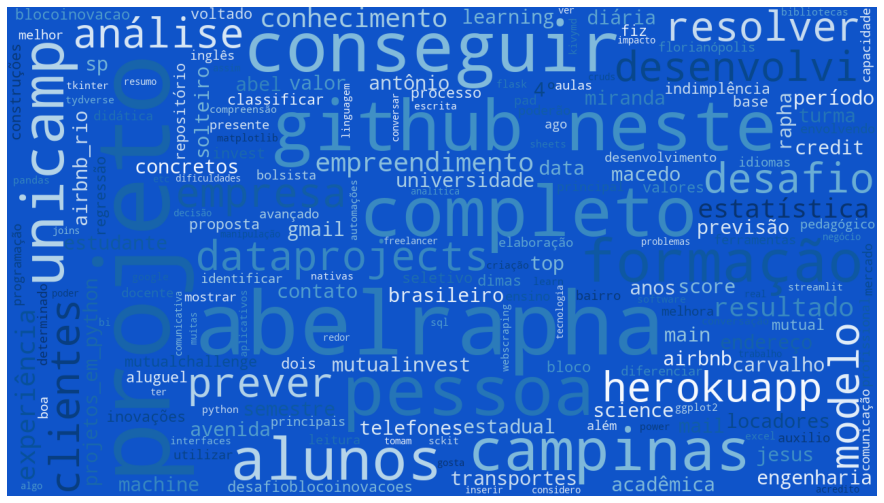

In [32]:
#mostrando a imagem final

import matplotlib.pyplot as plt

fig , ax = plt.subplots(figsize=(16,9))
ax.imshow(wordcloud)
ax.set_axis_off()
plt.imshow(wordcloud)
wordcloud.to_file('wordcloud.png')
plt.show()

# Criando uma tabela com pesos sobre os tópicos das vagas

In [33]:
import pandas as pd

In [36]:
dicionario = {'Palavras-chave': ['python', 'sql', 'linguagem r', 'machine learning', 'estatística', 'big data', 'negócio', 'graduação','pós graduaçao', 'mestrado','doutorado'], 'pesos': [1,1,1,2,2,2,2,1,1,1,1]}
tabela_pesos = pd.DataFrame(data= dicionario)
display(tabela_pesos)

,Palavras-chave,pesos
0,python,1
1,sql,1
2,linguagem r,1
3,machine learning,2
4,estatística,2
5,big data,2
6,negócio,2
7,graduação,1
8,pós graduaçao,1
9,mestrado,1


Separando as palavras chaves e pesos

In [37]:
palavras_chaves = list(tabela_pesos['Palavras-chave'])
palavras_chaves

['python',
 'sql',
 'linguagem r',
 'machine learning',
 'estatística',
 'big data',
 'negócio',
 'graduação',
 'pós graduaçao',
 'mestrado',
 'doutorado']

In [40]:
pesos = list(tabela_pesos['pesos'])
pesos
#transformando em um array
import numpy as np
pesos = np.array(pesos)

Definindo os limites de pesos para o cálculo de pontuação de cada vaga

In [41]:
limite = 5 #Cada 1 peso equivale 5 pontos

pmax = np.sum(pesos * limite) #somando a multiplicação dos pesos
print(pmax)

75


In [42]:
# Contando quantas vezes as palavras chaves ocorrem no CV

quantidade_de_palavras_chaves = [textocv.count(pc) for pc in palavras_chaves]
quantidade_de_palavras_chaves

[2, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0]

Criando uma função para limitar a quantidade de vezez que uma mesma palavra é repetida

In [46]:
def limite_score(x):
  return x if x <= limite else limite

quantidade_de_palavras_chaves = [limite_score(i) for i in quantidade_de_palavras_chaves]
quantidade_de_palavras_chaves

[2, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0]

In [49]:
#Calculando o Score

score = ((np.array(quantidade_de_palavras_chaves)*pesos).sum()/pmax).round(4)
score

0.16